# <div style="text-align:center;"> <font color="red">Comprehensive Assessment : Machine Learning </font></div>

### Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
* Which variables are significant in predicting the price of a car
* How well those variables describe the price of a car

### Objective:

Required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

### Methodology
1. Data Loading and Preprocessing
Data Loading: Load the dataset and perform initial exploration.
Data Cleaning: Handle missing values, remove duplicates, and address inconsistencies.
Feature Engineering: Create and transform features to prepare the dataset for modeling.
One-Hot Encoding: Encode categorical variables for model input.
Feature Scaling: Normalize or standardize features as needed.

2. Model Implementation
The following regression models were implemented:
Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor

3. Model Evaluation
Models were evaluated using the following metrics:
R-squared
Mean Squared Error (MSE)
Mean Absolute Error (MAE)

4. Feature Importance Analysis
Feature importance was analyzed using methods such as feature importance scores from tree-based models and coefficients from linear models.

5. Hyperparameter Tuning
Hyperparameter tuning was performed to optimize the best-performing model using techniques like Grid Search.

In [122]:
#ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [123]:
### Loading dataset

In [124]:
import pandas as pd
df = pd.read_csv('CarPrice_Assignment.csv')

In [125]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [126]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## Exploratory Data Analysis(EDA)

In [127]:
# shape
df.shape

(205, 26)

In [128]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [129]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [130]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [131]:
# Replacing the words into int
df.doornumber.replace('four',4,inplace = True)
df.doornumber.replace('two',2,inplace = True)
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [132]:
df['cylindernumber'].replace('four',4,inplace = True)
df['cylindernumber'].replace('six',6,inplace = True)
df['cylindernumber'].replace('five',5,inplace = True)
df['cylindernumber'].replace('three',3,inplace = True)
df['cylindernumber'].replace('twelve',12,inplace = True)
df['cylindernumber'].replace('two',2,inplace = True)
df['cylindernumber'].replace('eight',8,inplace = True)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

### Identify numerical and categorical columns

In [134]:
# Numerical columns
num_cols = df.select_dtypes(include='number').columns
print(num_cols)

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')


In [135]:
# Categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')


#### Out of 26 columns, 18 are numerical and 8 are categorical columns

### Checking for null values

In [136]:
# finding missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Checking for Duplicates

In [137]:
# finding duplicates
df.duplicated().sum()

0

#### There are no duplicate values

### Understand the distribution of data

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
doornumber,205.0,3.121951,0.994966,2.00,2.00,4.00,4.00,4.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
cylindernumber,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00


In [139]:
df.describe(include="object").T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
fuelsystem,205,8,mpfi,94


In [140]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

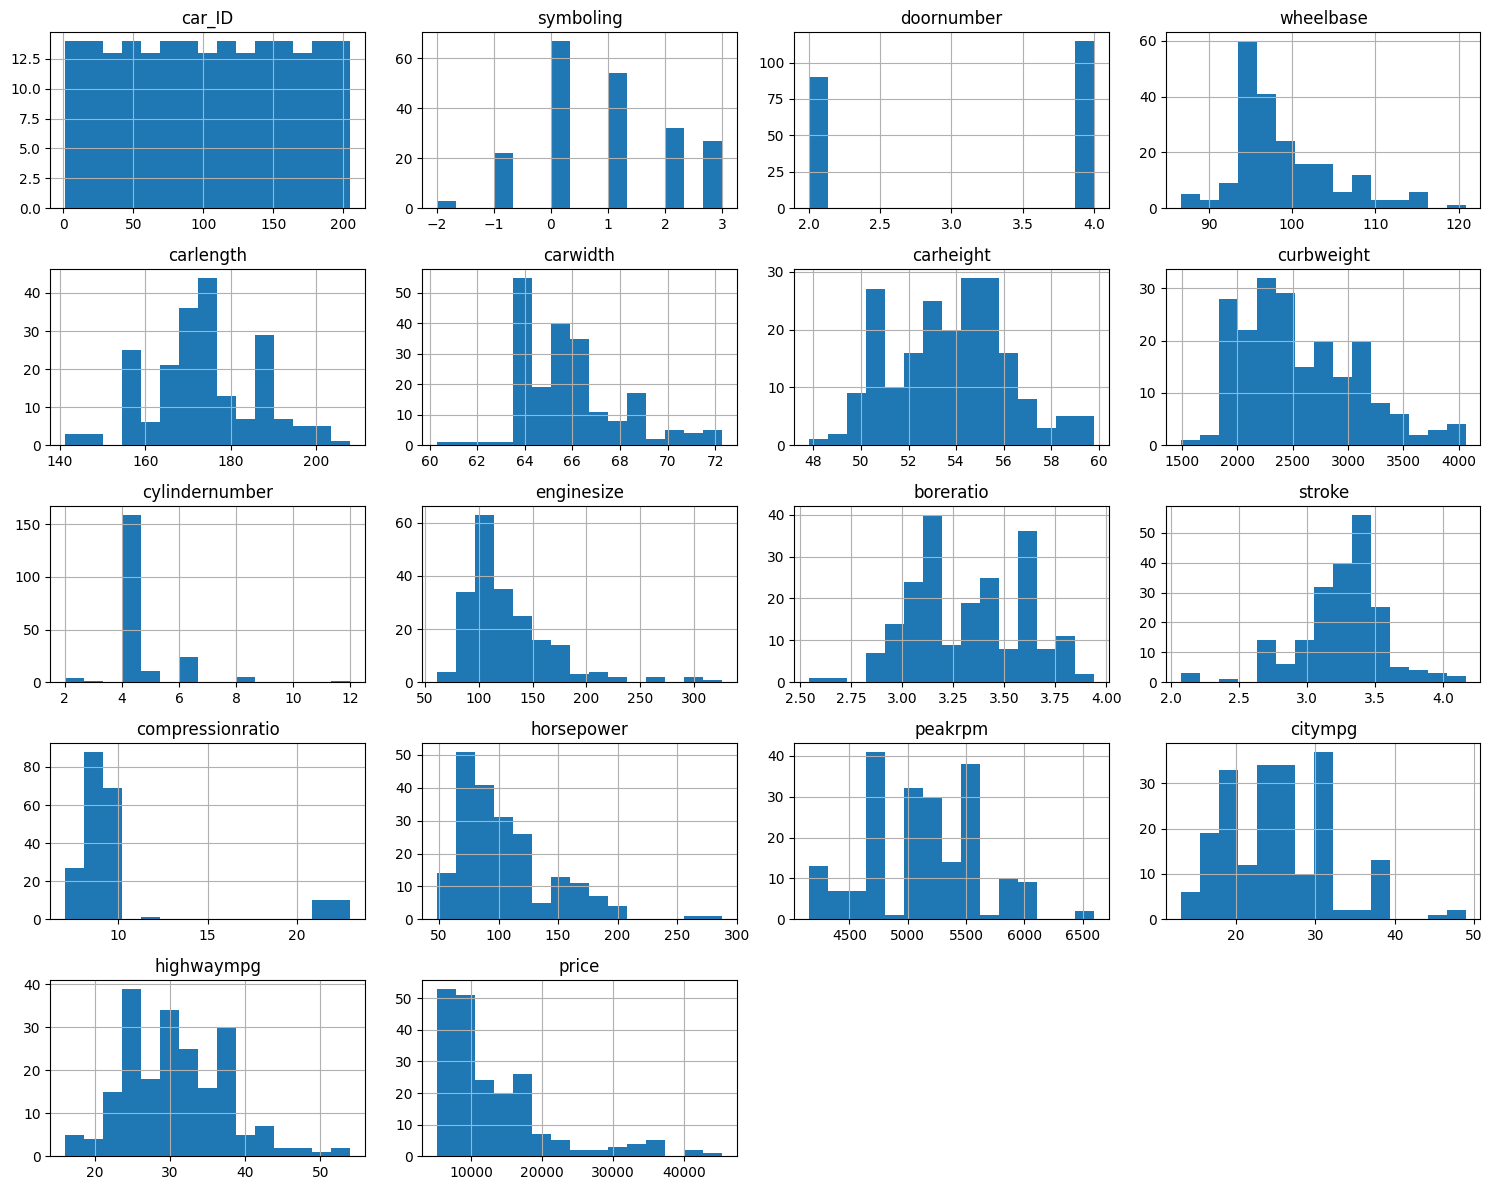

In [141]:
# Histograms for numerical columns
df[num_cols].hist(bins = 15, figsize =(15,12), layout=(5,4))
                                                
plt.tight_layout()
plt.show()      

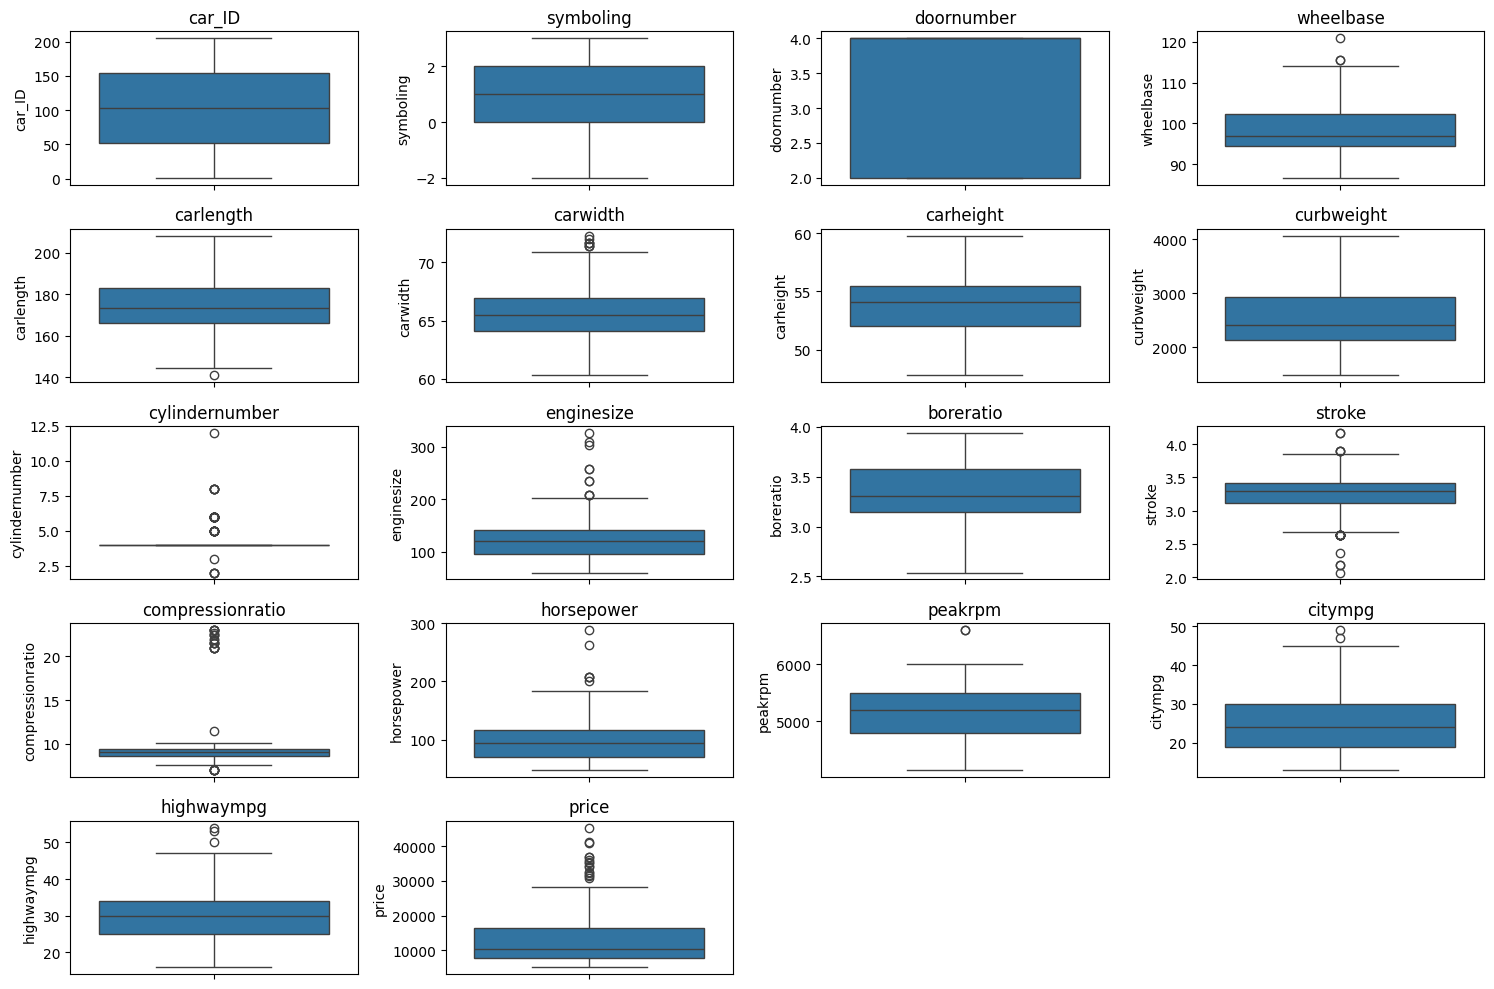

In [142]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
#enumerate() is a built-in Python function that allows you to loop over an iterable (like a list) and have an automatic counter.
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


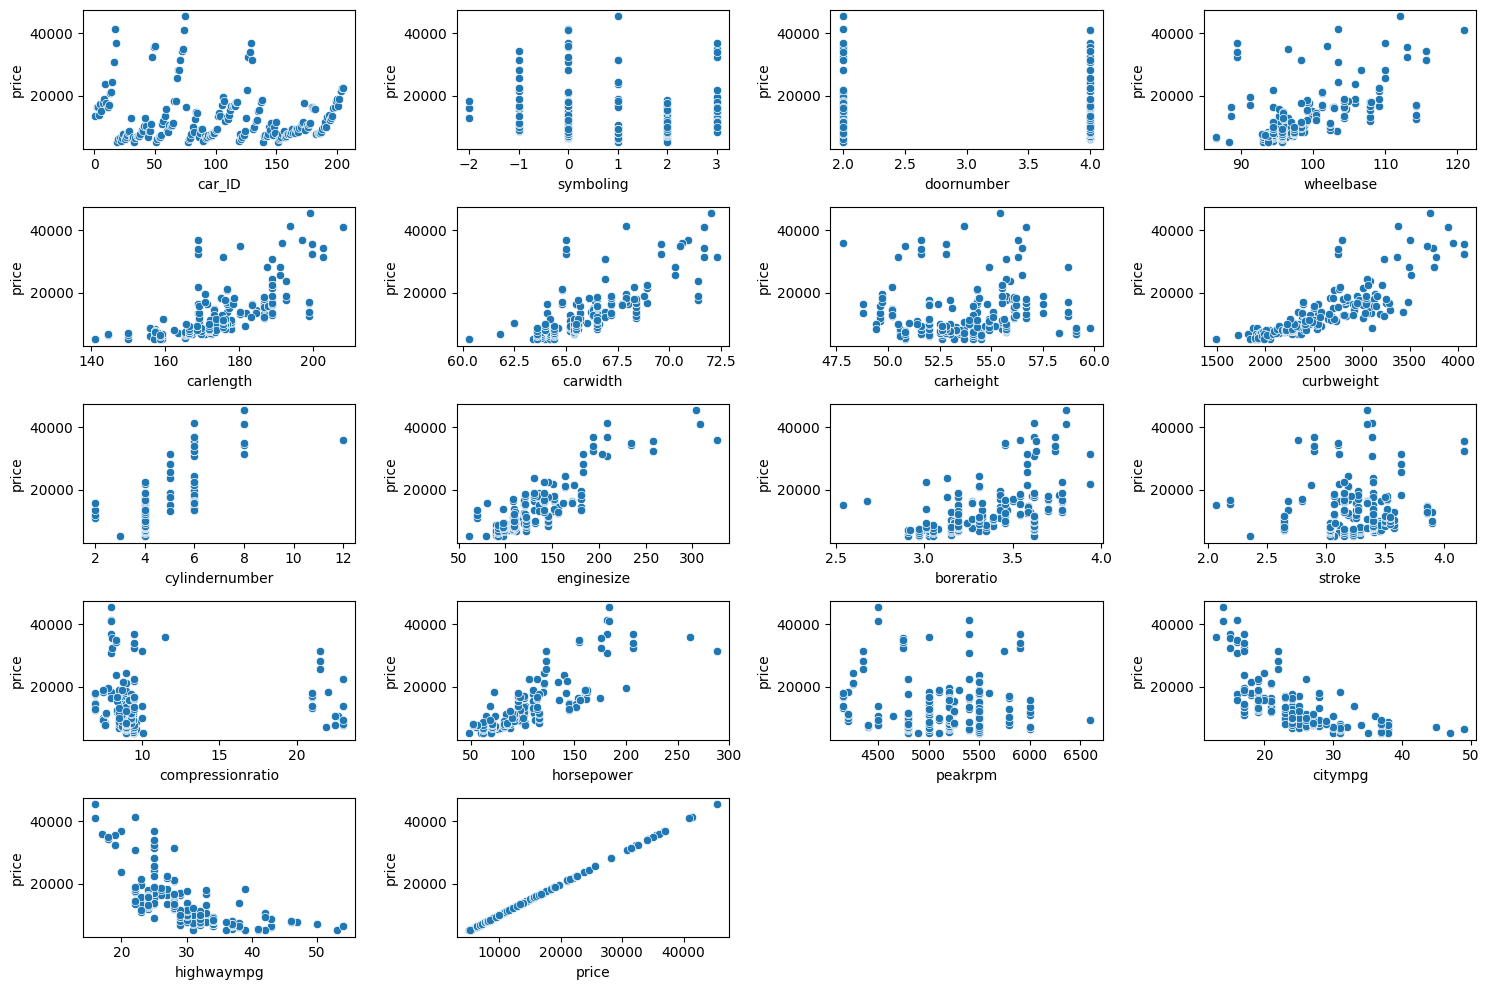

In [143]:
# scatter plot to identify the relationship between dependent (Price) and independent features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Skewness and Kurtosis

In [144]:
from scipy.stats import skew, kurtosis

In [145]:
# Calculate skewness and kurtosis
skewness = df[num_cols].apply(skew)
kurt = df[num_cols].apply(lambda x:kurtosis(x, fisher = False))

print(skewness)
print(kurt)                          


car_ID              0.000000
symboling           0.209525
doornumber         -0.245737
wheelbase           1.042514
carlength           0.154810
carwidth            0.897375
carheight           0.062660
curbweight          0.676402
cylindernumber      2.796801
enginesize          1.933375
boreratio           0.020009
stroke             -0.684648
compressionratio    2.591720
horsepower          1.395006
peakrpm             0.074608
citympg             0.658838
highwaympg          0.536038
price               1.764644
dtype: float64
car_ID               1.799943
symboling            2.310985
doornumber           1.060386
wheelbase            3.963276
carlength            2.889987
carwidth             3.656614
carheight            2.537812
curbweight           2.929058
cylindernumber      16.353508
enginesize           8.148030
boreratio            2.204849
stroke               5.092597
compressionratio     8.077161
horsepower           5.589862
peakrpm              3.055528
citympg      

In [146]:
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]

print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)

Variables with positive skewness (skew > 1):
 wheelbase           1.042514
cylindernumber      2.796801
enginesize          1.933375
compressionratio    2.591720
horsepower          1.395006
price               1.764644
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)


In [147]:
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]

print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)


Variables with platykurtic distribution (kurtosis < 3):
 car_ID        1.799943
symboling     2.310985
doornumber    1.060386
carlength     2.889987
carheight     2.537812
curbweight    2.929058
boreratio     2.204849
dtype: float64
Variables with leptokurtic distribution (kurtosis > 3):
 wheelbase            3.963276
carwidth             3.656614
cylindernumber      16.353508
enginesize           8.148030
stroke               5.092597
compressionratio     8.077161
horsepower           5.589862
peakrpm              3.055528
citympg              3.535505
highwaympg           3.400284
price                5.948598
dtype: float64


### correlation

<Axes: >

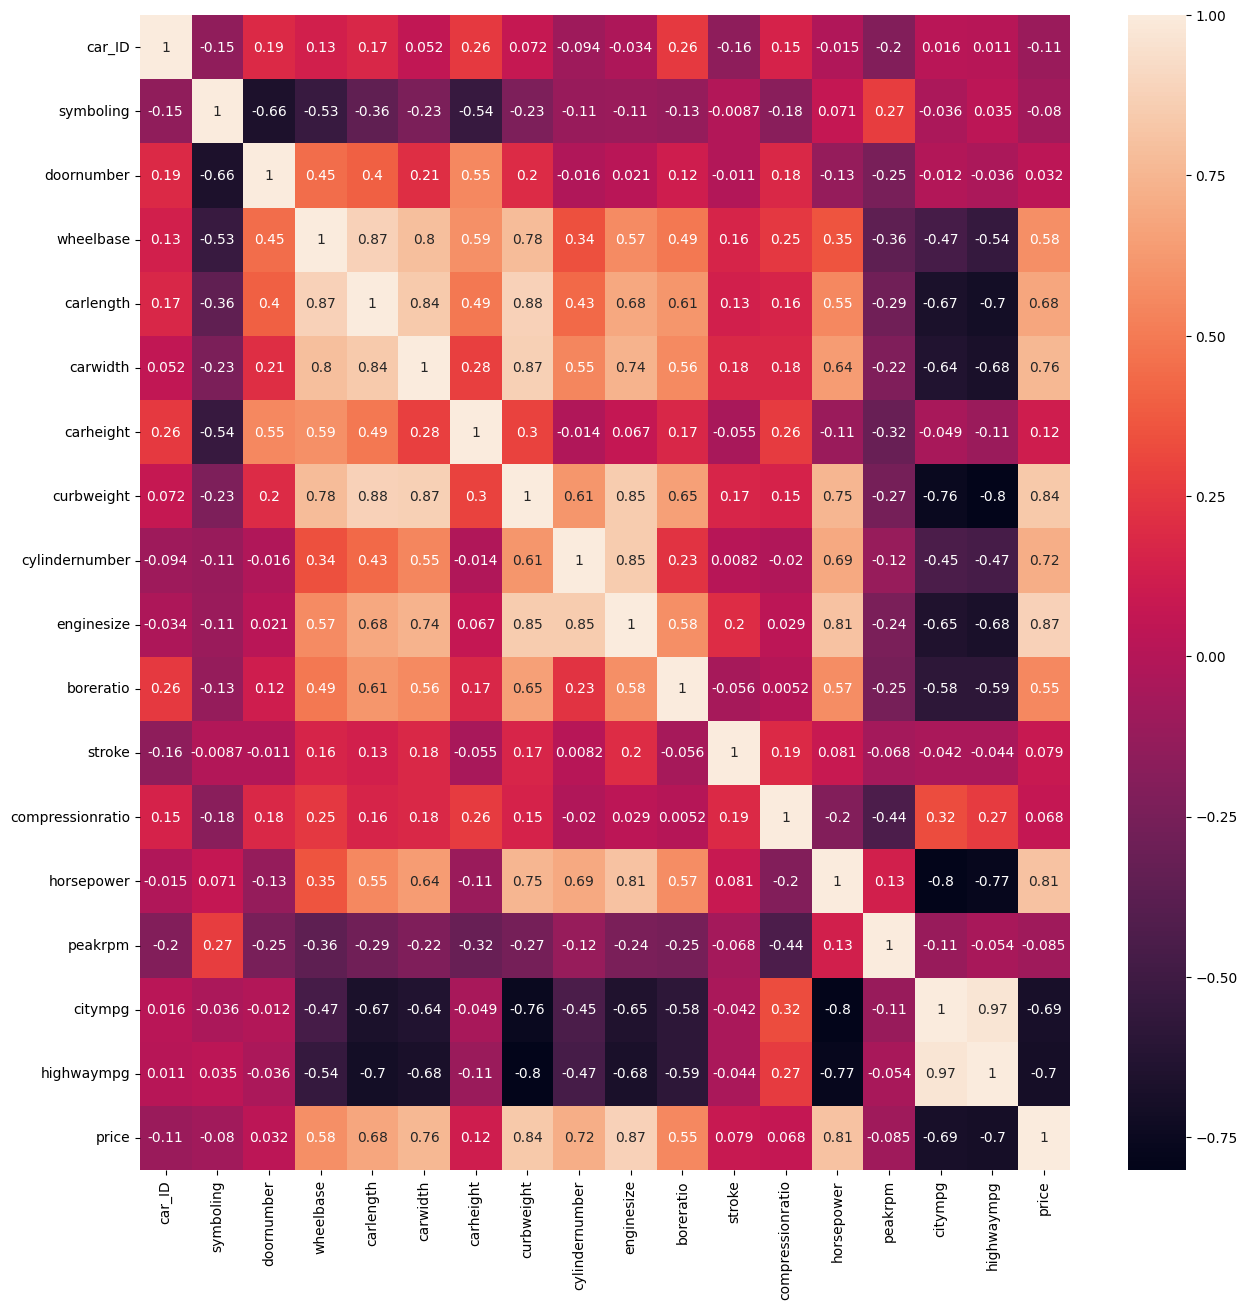

In [148]:
# correlation with heatmap to interpret the relation and multicolliniarity
plt.figure(figsize=(15,15))
sns.heatmap(df[num_cols].corr(),annot=True)

### Columns with multicollinearity

Wheelbase and Carlength

Wheelbase and Carwidth

Wheelbase and Curbweight

Carlength and Carwidth

Carlength and Curbweight

Carwidth and Curbweight

Carwidth and Enginesize

Curbweight and Enginesize

Curbweight and Horsepower

Cylindernumber and Enginesize

Enginesize and Horsepower

Citympg and Highwaympg

<Axes: xlabel='citympg', ylabel='highwaympg'>

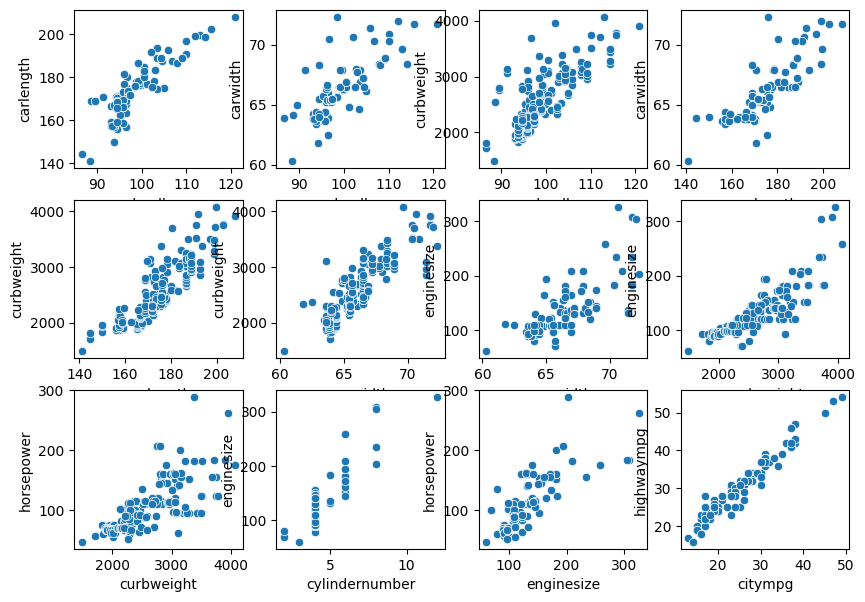

In [149]:
plt.figure(figsize=(10, 7))
plt.subplot(3,4,1)
sns.scatterplot(data=df,x='wheelbase',y='carlength')
plt.subplot(3,4,2)
sns.scatterplot(data=df,x='wheelbase',y='carwidth')
plt.subplot(3,4,3)
sns.scatterplot(data=df,x='wheelbase',y='curbweight')
plt.subplot(3,4,4)
sns.scatterplot(data=df,x='carlength',y='carwidth')
plt.subplot(3,4,5)
sns.scatterplot(data=df,x='carlength',y='curbweight')
plt.subplot(3,4,6)
sns.scatterplot(data=df,x='carwidth',y='curbweight')
plt.subplot(3,4,7)
sns.scatterplot(data=df,x='carwidth',y='enginesize')
plt.subplot(3,4,8)
sns.scatterplot(data=df,x='curbweight',y='enginesize')
plt.subplot(3,4,9)
sns.scatterplot(data=df,x='curbweight',y='horsepower')
plt.subplot(3,4,10)
sns.scatterplot(data=df,x='cylindernumber',y='enginesize')
plt.subplot(3,4,11)
sns.scatterplot(data=df,x='enginesize',y='horsepower')
plt.subplot(3,4,12)
sns.scatterplot(data=df,x='citympg',y='highwaympg')

We can drop the columns Wheelbase,Carlength,Carwidth,Cylindernumber,Highwaympg

Columns highly correlated with price:
Curbweight,Enginesize,Horsepower,Citympg,

### Analysing Categorical columns

In [150]:
for col in cat_cols:
 print(f"Values in {col}:\n{df[col].unique()}")
 print(f"Number of unique values in {col}: {df[col].nunique()}\n")

Values in CarName:
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk'

There are 147 unique values in country column, 2 unique values in fueltype,aspiration,enginelocation column,
5 unique values in carbody, 3 unique values in drivewheel, 7 unique values in enginetype and 8 unique values in fuelsystem.

## Data Preprocessing

In [151]:
df1=df.copy()
df1.shape

(205, 26)

### Remove unnecessary columns

#### Columns with multicollinearity

In [152]:
df1.drop(['wheelbase','carlength','carwidth','cylindernumber','highwaympg'],axis=1, inplace=True)
df1.shape

(205, 21)

#### Columns do not carry any useful information for the predictive model.

In [153]:
# Dropping the columns car_ID and symboling
# No relationship found between car_ID and symboling
df1.drop(['car_ID','symboling'],axis=1,inplace=True)
df1.shape

(205, 19)

## Handling Outliers

### Here IQR method is used for outlier treatment

In [154]:
def whisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3-q1
    lw = q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw,uw

In [155]:
for i in df1.select_dtypes(include="number").columns:
    lw,uw=whisker(df1[i])
    df1[i]=np.where(df1[i]<lw,lw,df1[i])
    df1[i]=np.where(df1[i]>uw,uw,df1[i])

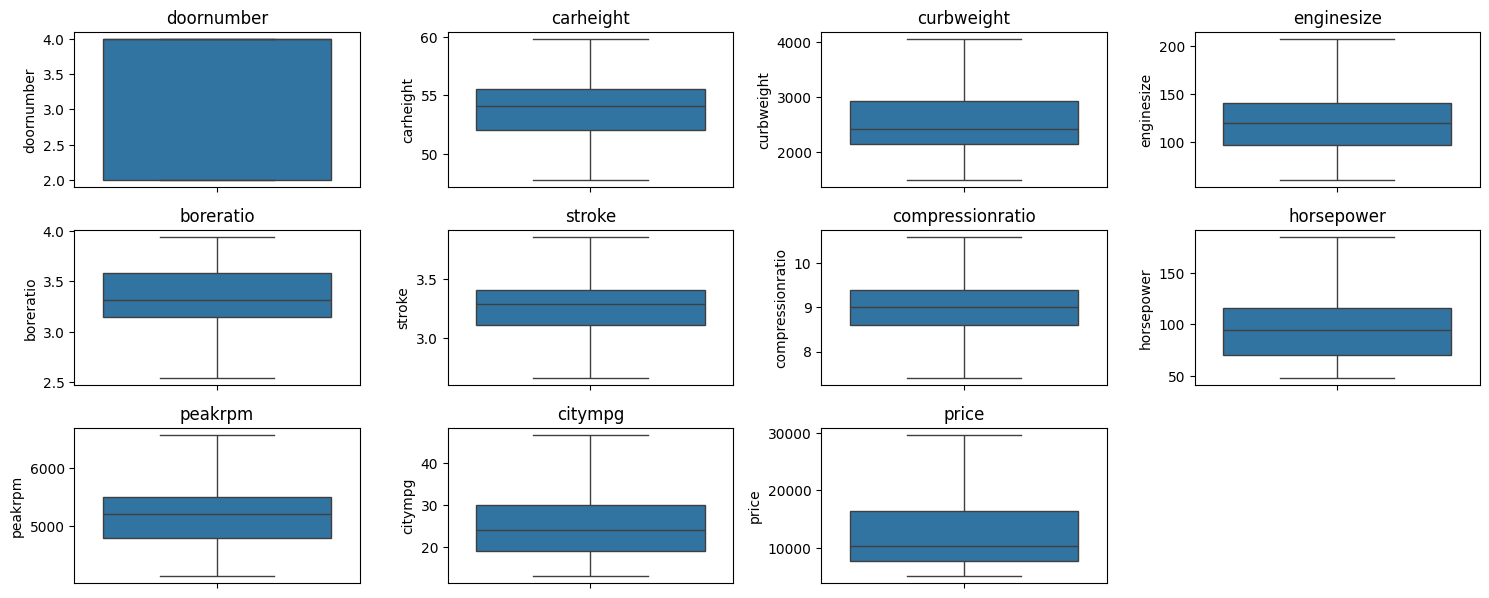

In [156]:
#box plot to identify outliers
plt.figure(figsize=(15, 10))
numeric_columns = df1.select_dtypes(include='number').columns
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df1[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [157]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    float64
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    float64
 9   enginetype        205 non-null    object 
 10  enginesize        205 non-null    float64
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    float64
 16  peakrpm           205 non-null    float64
 1

#### All the outliers are removed.

### Check the skewness and kurtosis after outlier treatment

In [158]:
# Calculate skewness and kurtosis
skewness = df1[numeric_columns].apply(skew)
kurt = df1[numeric_columns].apply(lambda x: kurtosis(x, fisher=False))
print(skewness)
print(kurt)
# Identify positive and negative skewness (absolute value > 1)
positive_skewness = skewness[skewness > 1]
negative_skewness = skewness[skewness < -1]
print('Variables with positive skewness (skew > 1):\n', positive_skewness)
print('Variables with negative skewness (skew < -1):\n', negative_skewness)
# Identify platykurtic (kurtosis < 3) and leptokurtic (kurtosis > 3) distributions
platykurtic = kurt[kurt < 3]
leptokurtic = kurt[kurt > 3]
print('Variables with platykurtic distribution (kurtosis < 3):\n', platykurtic)
print('Variables with leptokurtic distribution (kurtosis > 3):\n', leptokurtic)

doornumber         -0.245737
carheight           0.062660
curbweight          0.676402
enginesize          0.901793
boreratio           0.020009
stroke             -0.376351
compressionratio    0.034891
horsepower          0.808981
peakrpm             0.049569
citympg             0.600161
price               1.213071
dtype: float64
doornumber          1.060386
carheight           2.537812
curbweight          2.929058
enginesize          3.050098
boreratio           2.204849
stroke              3.270002
compressionratio    3.092680
horsepower          2.710045
peakrpm             2.976756
citympg             3.278575
price               3.644283
dtype: float64
Variables with positive skewness (skew > 1):
 price    1.213071
dtype: float64
Variables with negative skewness (skew < -1):
 Series([], dtype: float64)
Variables with platykurtic distribution (kurtosis < 3):
 doornumber    1.060386
carheight     2.537812
curbweight    2.929058
boreratio     2.204849
horsepower    2.710045
peakrpm

## Visualization

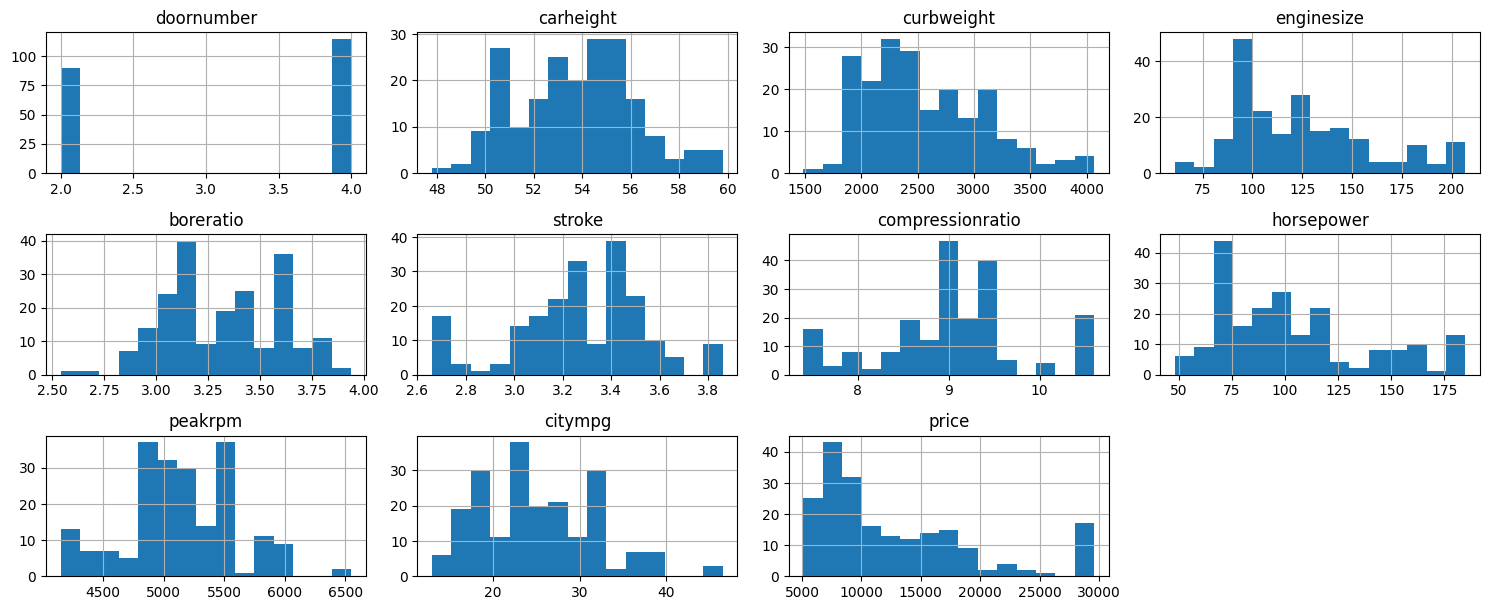

In [159]:
# Histograms for numerical columns after outlier treatment
df1[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.tight_layout()
plt.show()

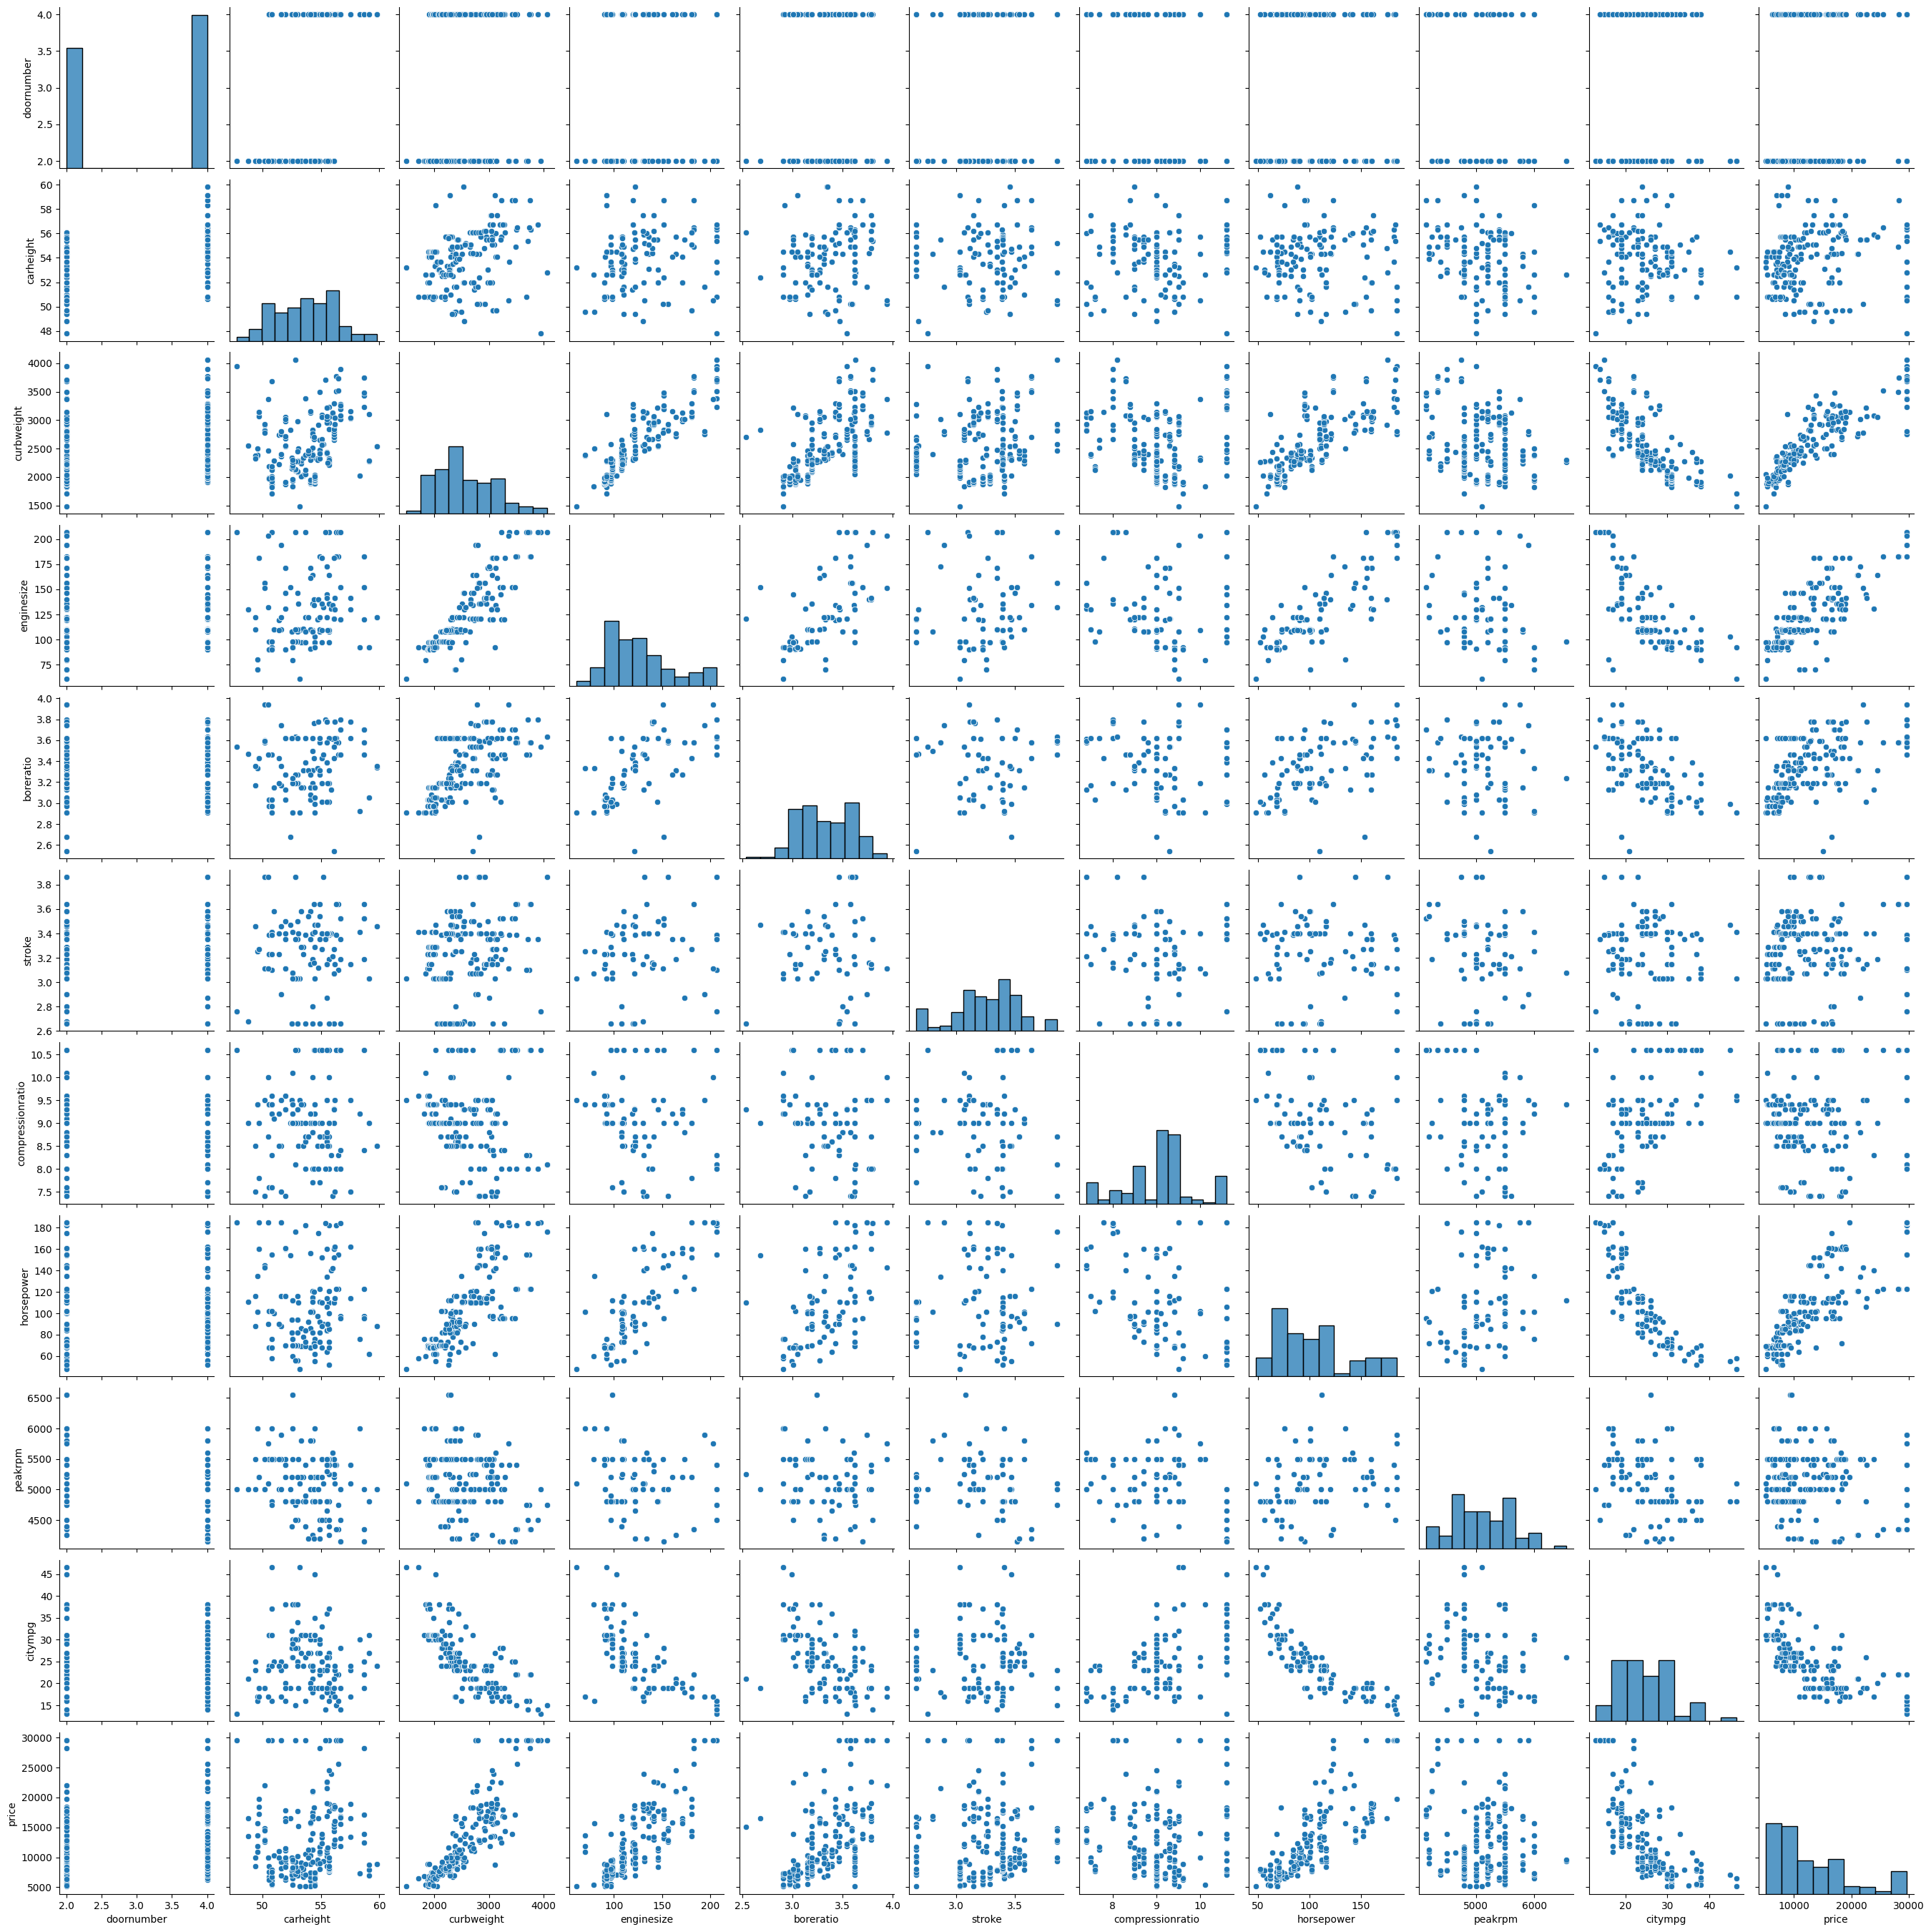

In [160]:
#Pair plot - To visualize relationships between multiple pairs of variables.
sns.pairplot(df1)

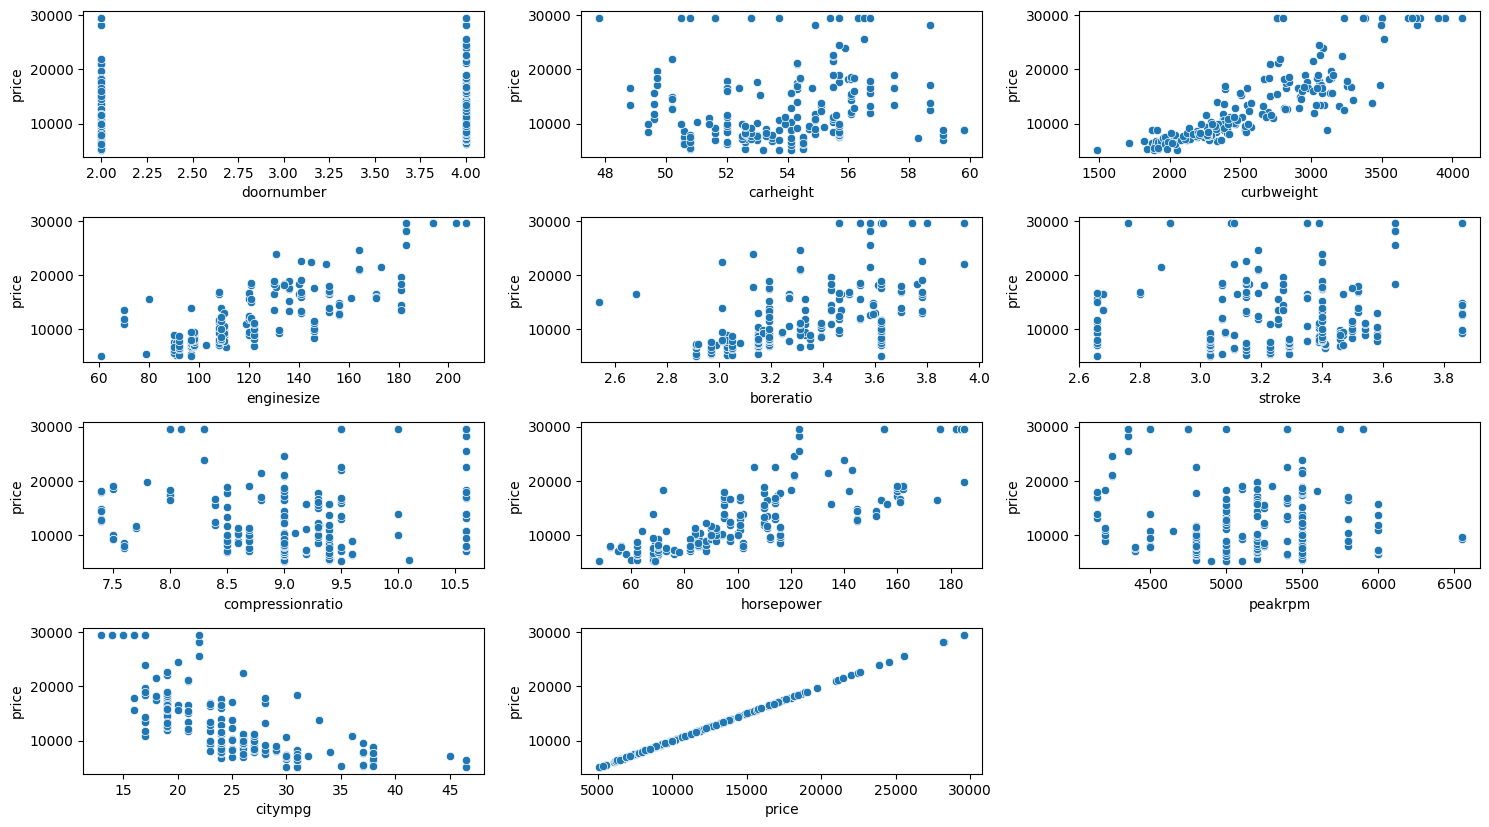

In [161]:
# scatter plot to identify the relationship between dependent (price) and independent features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df1,x=col,y='price')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<Axes: >

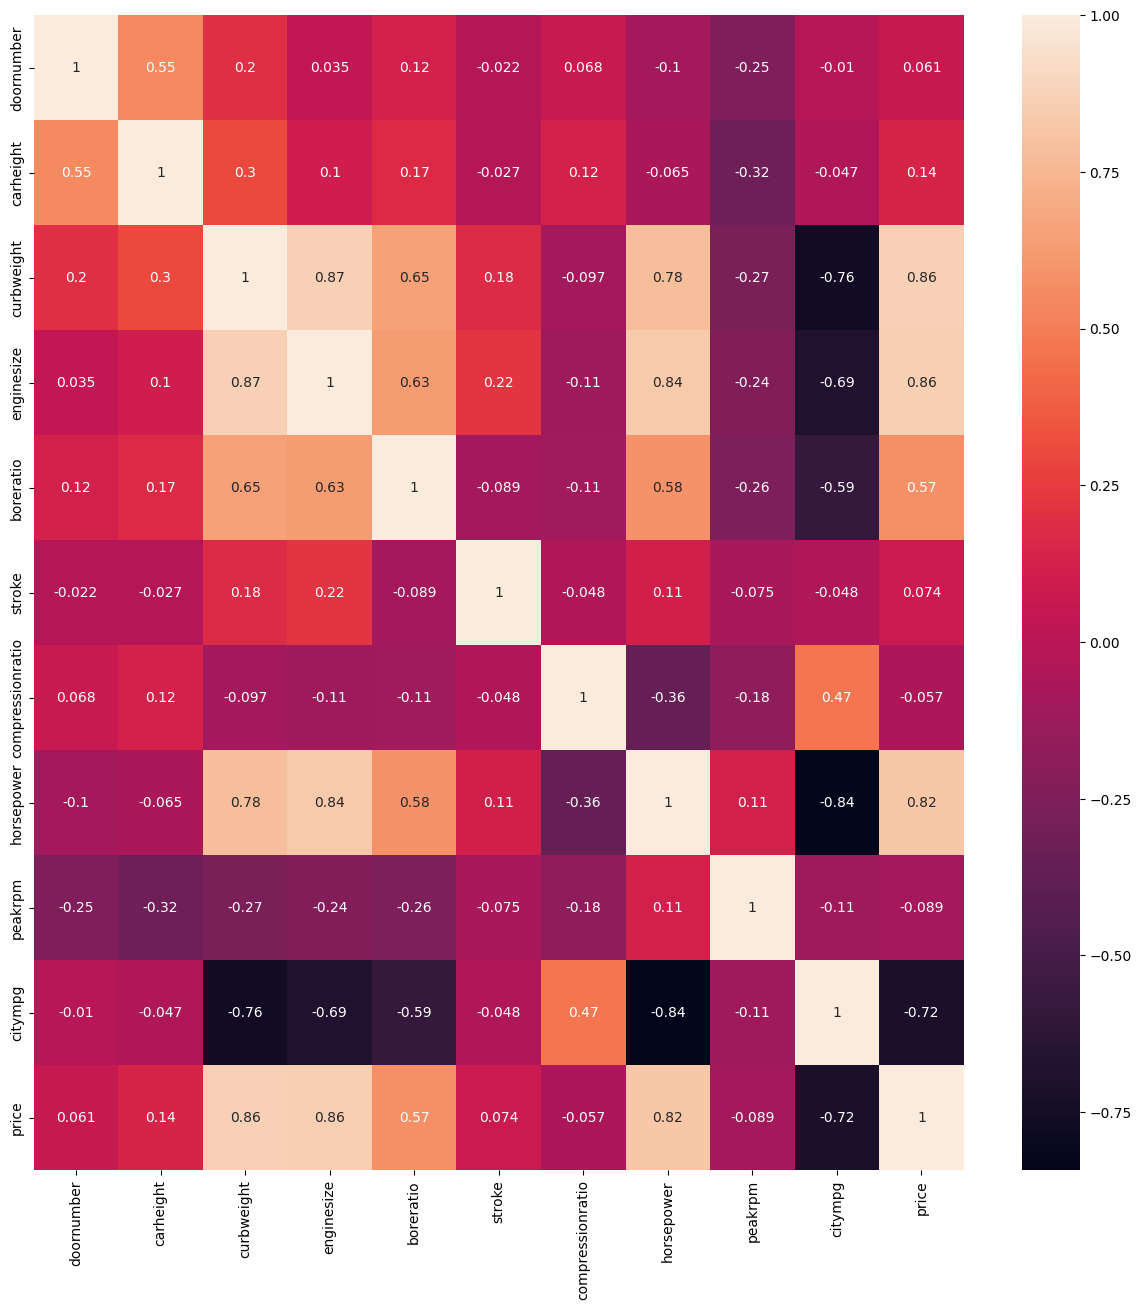

In [162]:
plt.figure(figsize=(15,15))
sns.heatmap(df1[numeric_columns].corr(),annot=True)

## Feature Engineering

In [163]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    float64
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    float64
 9   enginetype        205 non-null    object 
 10  enginesize        205 non-null    float64
 11  fuelsystem        205 non-null    object 
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    float64
 16  peakrpm           205 non-null    float64
 1

In [164]:
# Perform one-hot encoding 
df1 = pd.get_dummies(df1, columns=['CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype', 'fuelsystem'], drop_first=True)


In [165]:
df1.head()

,doornumber,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2.0,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,...,False,False,False,False,False,False,False,True,False,False
1,2.0,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,...,False,False,False,False,False,False,False,True,False,False
2,2.0,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,...,False,True,False,False,False,False,False,True,False,False
3,4.0,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,...,False,False,False,False,False,False,False,True,False,False
4,4.0,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,...,False,False,False,False,False,False,False,True,False,False


In [166]:
X=df1.drop('price',axis=1)
y=df1[['price']]

In [167]:
X.head()

,doornumber,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2.0,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,...,False,False,False,False,False,False,False,True,False,False
1,2.0,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,...,False,False,False,False,False,False,False,True,False,False
2,2.0,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,...,False,True,False,False,False,False,False,True,False,False
3,4.0,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,...,False,False,False,False,False,False,False,True,False,False
4,4.0,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,...,False,False,False,False,False,False,False,True,False,False


In [168]:
X.shape

(205, 178)

In [169]:
y.shape

(205, 1)

#### Scale numerical features to ensure that they have the same magnitude, preventing some features from dominating others during model training.

In [170]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Convert the result back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,doornumber,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.130388,-2.020417,-0.014566,0.160196,0.519071,-2.106623,-0.049433,0.229801,-0.262757,-0.649321,...,-0.280976,-0.260208,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
1,-1.130388,-2.020417,-0.014566,0.160196,0.519071,-2.106623,-0.049433,0.229801,-0.262757,-0.649321,...,-0.280976,-0.260208,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
2,-1.130388,-0.543527,0.514882,0.809329,-2.404880,0.753841,-0.049433,1.441341,-0.262757,-0.958163,...,-0.280976,3.843076,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
3,0.884652,0.235942,-0.420797,-0.459430,-0.517266,0.500383,1.214121,-0.023777,0.791357,-0.186058,...,-0.280976,-0.260208,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
4,0.884652,0.235942,0.516807,0.337232,-0.517266,0.500383,-1.312986,0.342502,0.791357,-1.112584,...,-0.280976,-0.260208,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.884652,0.728239,0.763241,0.484762,1.666445,-0.404828,0.582344,0.314327,0.580534,-0.340479,...,-0.280976,-0.260208,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
201,0.884652,0.728239,0.949992,0.484762,1.666445,-0.404828,-0.428499,1.610393,0.369711,-0.958163,...,-0.280976,-0.260208,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
202,0.884652,0.728239,0.878757,1.428955,0.926204,-1.418663,-0.302143,0.877834,0.791357,-1.112584,...,-0.280976,3.843076,-0.141069,-0.689072,-0.121867,-0.328798,-0.070014,1.086670,-0.214286,-0.070014
203,0.884652,0.728239,1.273437,0.602787,-1.183483,0.500383,1.972253,0.088924,-0.684403,0.122783,...,-0.280976,-0.260208,-0.141069,-0.689072,-0.121867,3.041381,-0.070014,-0.920243,-0.214286,-0.070014


### Data Splitting

In [171]:
#Splitting the dataset into 80-20, that is, 80% of the data is for training and 20% of the data is for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model Selection

#### Models Selected: LinearRegression, DecisionTreeRegressor,ExtraTreeRegressor, RandomForestRegressor,GradientBoostingRegressor, SVR, MLPRegressor, XGBRegressor

### Model Training & Evaluation

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [173]:
model_name= []
RMSE = []
MSE = []
MAE = []

models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
]

for model in models:
    model.fit(X_train,y_train)

    prediction = model.predict(X_test)

    model_name.append(model.__class__.__name__)

    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))
    

In [174]:
models_df = pd.DataFrame({"Model_Name":model_name, "RMSE":RMSE, "MSE":MSE, "MAE":MAE})
models_df = models_df.set_index("Model_Name")
models_df

,RMSE,MSE,MAE
Model_Name,,,
LinearRegression,3.951626e+16,1.561535e+33,2.298741e+16
DecisionTreeRegressor,2.101492e+03,4.416268e+06,1.428167e+03
RandomForestRegressor,1.673542e+03,2.800743e+06,1.194946e+03
GradientBoostingRegressor,1.662794e+03,2.764883e+06,1.171548e+03
SVR,7.616340e+03,5.800863e+07,5.114624e+03


### Analysis
#### Linear Regression:
The metrics indicate extremely high errors, suggesting that this model is not suitable for this dataset.
#### Decision Tree Regressor:
Performs better than Linear Regression but still has relatively high errors.
#### Random Forest Regressor:
Shows significant improvement over Decision Tree Regressor with lower RMSE, MSE, and MAE values.
#### Gradient Boosting Regressor:
Slightly better performance than Random Forest Regressor, making it the best performing model among the ones listed.
#### Support Vector Regressor (SVR):
Has higher errors compared to Random Forest and Gradient Boosting, indicating it is not as effective for this dataset.

### Feature selection

In [175]:
from sklearn.feature_selection import SelectKBest, f_regression
# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X_train, y_train)
# Get the selected feature indices
selected_indices_kbest = selector_kbest.get_support(indices=True)
# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]
print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc', 'fuelsystem_2bbl',
       'fuelsystem_mpfi'],
      dtype='object')


#### It has been found that the following are the significant variables affecting car price :
##### 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg','drivewheel_fwd', 'drivewheel_rwd', 'enginetype_ohc', 'fuelsystem_2bbl','fuelsystem_mpfi'

#### Finding the feature importance using Random forest

In [176]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train , y_train)
# Extract feature importances
feature_importances = rf.feature_importances_
# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
# Print feature importances
print("Feature Importances:")
for idx in sorted_indices:
 print(f"{X.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
curbweight: 0.5807942530592994
enginesize: 0.2811191486595171
horsepower: 0.03657228337396919
citympg: 0.027699640516142515
stroke: 0.00972308385933766
peakrpm: 0.009693967748979678
carheight: 0.007007006809336197
boreratio: 0.005801771236204666
CarName_bmw z4: 0.004145202310851209
CarName_bmw 320i: 0.004102689147876926
compressionratio: 0.0031094850489306776
fuelsystem_mpfi: 0.002302124630958643
carbody_sedan: 0.0021206141567174375
drivewheel_rwd: 0.0021145809271217275
enginetype_ohc: 0.0017882011248587701
CarName_audi 100 ls: 0.0016104373952155527
aspiration_turbo: 0.0013909652478382667
CarName_audi 4000: 0.0013404502580008242
CarName_volvo 264gl: 0.001213215251757067
fuelsystem_2bbl: 0.0010003663307440284
CarName_volvo 246: 0.0009393922107443525
CarName_peugeot 304: 0.0009124906501945393
carbody_hatchback: 0.0008717680387451396
doornumber: 0.0007032235680952185
CarName_toyota corolla: 0.0006749340313792704
drivewheel_fwd: 0.0006452688634514162
CarName_peugeot 50

### Conclusion
#### The Gradient Boosting Regressor appears to be the best performing model based on the provided metrics. It has the lowest RMSE, MSE, and MAE values, indicating better predictive accuracy and lower errors compared to the other models.
#### Curbweight and Engine size are the most significant variables affecting car price.

### Hyperparameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
param_grids = {
'LinearRegression': {
'fit_intercept': [True, False],
 },
'DecisionTreeRegressor': {
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
'splitter': ['best', 'random'],
'max_depth': [None, 10, 20, 30, 40, 50],
'min_samples_split': [2, 10, 20],
'min_samples_leaf': [1, 5, 10],
'max_features': [None, 'auto', 'sqrt', 'log2']
},
'RandomForestRegressor': {
'n_estimators': [100, 200, 300, 400, 500],
'criterion': ['squared_error', 'absolute_error', 'poisson'],
'max_depth': [None, 10, 20, 30, 40, 50],
'min_samples_split': [2, 10, 20],
'min_samples_leaf': [1, 5, 10],
'max_features': ['auto', 'sqrt', 'log2']
},
'GradientBoostingRegressor': {
'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
'learning_rate': [0.01, 0.05, 0.1, 0.2],
'n_estimators': [100, 200, 300, 400, 500],
'subsample': [0.6, 0.8, 1.0],
'criterion': ['squared_error', 'friedman_mse'],
'max_depth': [3, 5, 7, 9],
'min_samples_split': [2, 10, 20],
'min_samples_leaf': [1, 5, 10],
'max_features': ['auto', 'sqrt', 'log2']
},
'SVR': {
'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
'C': [0.1, 1, 10, 100, 1000],
'gamma': ['scale', 'auto'],
'degree': [3, 4, 5],
'epsilon': [0.1, 0.2, 0.5, 0.3]
},
}
# Lists to store the results
model_name = []
RMSE = []
MSE = []
MAE = []

models = [
LinearRegression(),
DecisionTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
SVR(),
]
for model in models:
    model_class_name = model.__class__.__name__
    param_grid = param_grids[model_class_name]
 
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
 
    best_model = grid_search.best_estimator_
    prediction = best_model.predict(X_test)
 
    model_name.append(model_class_name)
    RMSE.append(mean_squared_error(y_test, prediction, squared=False))
    MSE.append(mean_squared_error(y_test, prediction))
    MAE.append(mean_absolute_error(y_test, prediction))

# Create a DataFrame with the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE 
})
models_df = models_df.set_index('Model-Name')
print(models_df)

### Results 
The results showed that Gradient Boosting Regressor performed the best with an R-squared of 1.66, MSE of 2.76, and MAE of 1.17. The most significant variables affecting car prices were CurbWeight, EngineSize, and Horsepower.

### Conclusion
The Gradient Boosting Regressor appears to be the best performing model based on the provided metrics. It has the lowest RMSE, MSE, and MAE values, indicating better predictive accuracy and lower errors compared to the other models. Curbweight and Engine size are the most significant variables affecting car price.
The project successfully identified the key factors influencing car prices in the American market and provided a predictive model to assist the company in strategic decision-making.